Algoritmo no supervisado - no va etiquetado - no necesita datos históricos

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/afoone/caipc-laberit-oct2022/master/data/wine-clustering.csv')

In [7]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
df.shape

(178, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


<AxesSubplot: ylabel='Frequency'>

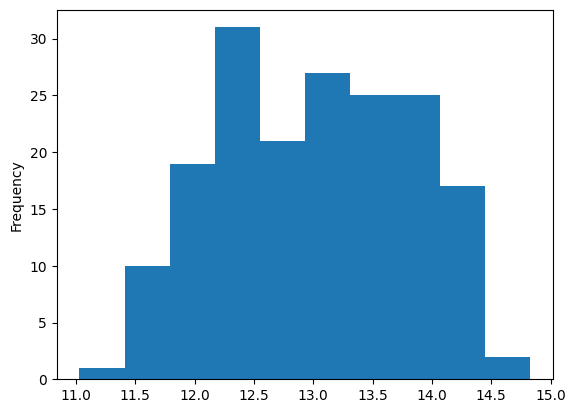

In [12]:
df['Alcohol'].plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

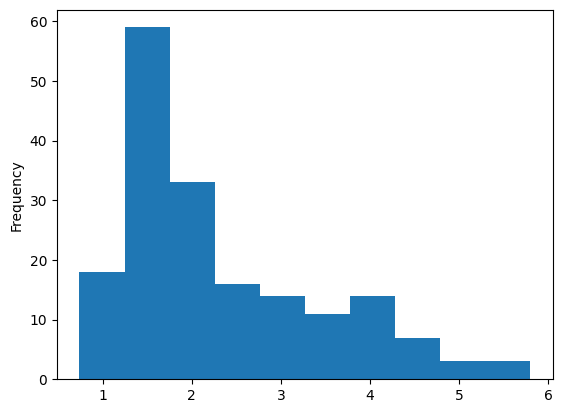

In [14]:
df['Malic_Acid'].plot(kind='hist')

In [15]:
df['Malic_Acid'].min()

0.74

In [16]:
df['Malic_Acid'].max()

5.8

In [17]:
(df['Alcohol']-df['Alcohol'].min())/ (df['Alcohol'].max()- df['Alcohol'].min())

0      0.842105
1      0.571053
2      0.560526
3      0.878947
4      0.581579
         ...   
173    0.705263
174    0.623684
175    0.589474
176    0.563158
177    0.815789
Name: Alcohol, Length: 178, dtype: float64

In [18]:
norm = (df- df.min())/(df.max()-df.min())

In [19]:
norm

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


# Clustering jerárquico

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
cj = AgglomerativeClustering(n_clusters=10).fit(norm)

In [26]:
cj

AgglomerativeClustering(n_clusters=10)

In [27]:
cj.labels_

array([1, 1, 1, 9, 8, 9, 1, 1, 1, 1, 9, 1, 1, 9, 9, 1, 1, 1, 9, 1, 1, 1,
       1, 1, 1, 8, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 9, 9, 1, 9, 1, 1, 1, 1, 1, 9, 5, 5, 5, 2, 2, 3, 3,
       2, 2, 5, 7, 5, 8, 2, 8, 2, 5, 2, 5, 7, 6, 2, 2, 3, 4, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 7, 5, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       6, 2, 3, 3, 2, 3, 2, 2, 4, 6, 2, 8, 6, 6, 6, 2, 2, 3, 2, 6, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4,
       4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0,
       4, 4])

(array([19., 46., 31., 17., 31.,  8.,  7.,  3.,  5., 11.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

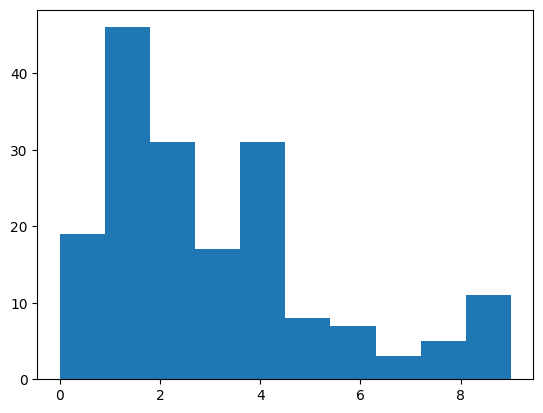

In [32]:
plt.hist(cj.labels_)

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage


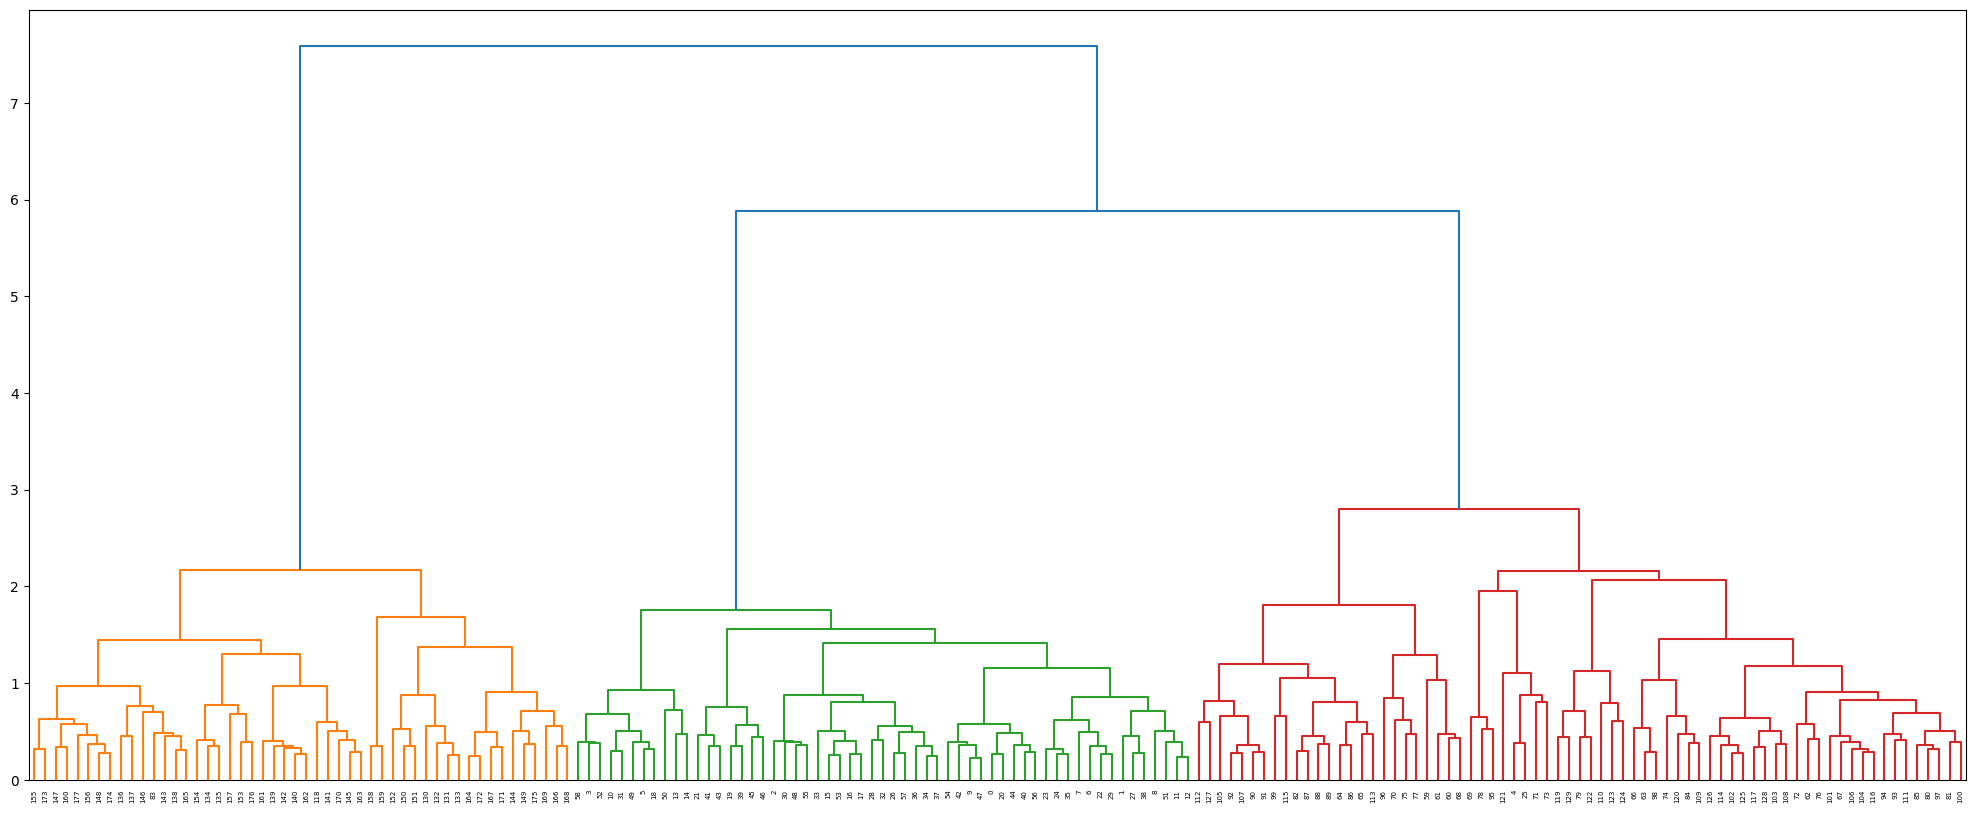

In [35]:
z = linkage(norm, 'ward')
plt.figure(figsize=(25, 10))
dendrogram(z)
plt.show()

# K-Means

In [36]:
from sklearn.cluster import KMeans

In [37]:
clus = KMeans(n_clusters=3, max_iter=500)

In [38]:
clus.fit(norm)

KMeans(max_iter=500, n_clusters=3)

In [67]:
prediction_start = clus.labels_
prediction_start

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [40]:
df['cluster'] = clus.labels_


In [41]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [42]:
clus.cluster_centers_

array([[0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397],
       [0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.31137521, 0.23689915, 0.47291703, 0.49991686, 0.2477209 ,
        0.45305895, 0.38240098, 0.4117468 , 0.39742546, 0.14773478,
        0.47351167, 0.58897554, 0.15640099]])

In [44]:
clus.inertia_ # Suma de cuadrados de las distancias de cada elemento con su centroide (el centroide de su cluster)

48.9605171366765

In [45]:
KMeans(n_clusters=1).fit(norm).inertia_


95.5995377847106

In [47]:
KMeans(n_clusters=178).fit(norm).inertia_

0.0

In [49]:
results = list()

for i in range(1,20):
    results.append(KMeans(n_clusters=i).fit(norm).inertia_)

results

[95.5995377847106,
 64.53766702389431,
 48.9605171366765,
 44.76933054082478,
 42.49872531012248,
 39.728236664078466,
 37.94319641185109,
 35.980901610897874,
 34.41712974570946,
 33.36869055160871,
 31.890872866159164,
 30.50094537790698,
 29.039914165818498,
 28.70743415606752,
 28.355289230648623,
 26.964659744680727,
 26.363800787198265,
 25.39507401732213,
 25.08910908783652]

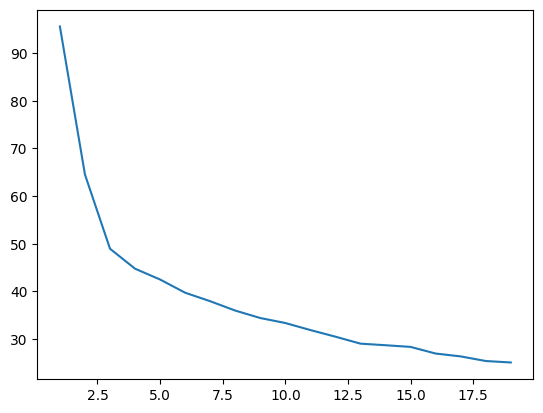

In [50]:
plt.plot(range(1,20), results)

In [51]:
norm.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [53]:
res_2 = KMeans(n_clusters=5).fit(norm[['Alcohol', 'Malic_Acid']])

In [54]:
res_2


KMeans(n_clusters=5)

In [61]:
prediction = res_2.predict(norm[['Alcohol', 'Malic_Acid']])

In [58]:
colors = {
    0: 'red',
    1: 'green', 
    2: 'blue', 
    3: 'orange',
    4: 'grey'
}

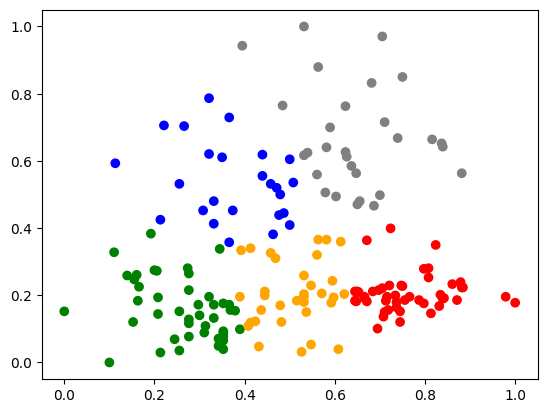

In [64]:
plt.scatter(x=norm['Alcohol'], y=norm['Malic_Acid'], c=pd.Series(prediction).map(colors))

In [65]:
from sklearn.metrics import silhouette_score

In [68]:
silhouette_score(norm[['Alcohol', 'Malic_Acid']], prediction)

0.388171115827191

In [69]:
silhouette_score(norm, prediction_start)

0.3008938518500134